# HR Dataset - Statistics Review

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Explore the data

The data set we will use for this exercise comes from a Kaggle challenge and is often used for predictive analytics, namely to predict why the best and most experienced employees tend to leave the company.  We won't be using it for any predictive purposes here, but will instead use this data set to review many of the concepts explored in the Statistical Inference lectures.

This data contains fields for various measures of employee performance and reported satisfaction levels, as well as categorical variables for events and salary level.  For now, just explore the data a bit to get a general idea of what is going on.

In [19]:
HR_data = pd.read_csv('HR_comma_sep.csv')

In [20]:
HR_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
HR_data.shape

(14999, 10)

In [22]:
HR_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [24]:
HR_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [26]:
HR_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [30]:
HR_data.rename(columns={list(HR_data)[3]: 'average_monthly_hours'}, inplace=True)
HR_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [54]:
HR_data.rename(columns={list(HR_data)[5]: 'work_accident'}, inplace=True)
HR_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [55]:
HR_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Probability, Expectation Values, and Variance

The concepts of probability, expectation values, and variance are the bedrock of statistical inference.  Let's begin by employing these concepts to see if we can find interesting paths to go down which may provide insight into the inner workings of this company.

1. What is the probability that a randomly selected employee left the company?  What about experienced a work accident?  Also, compute the probability that a randomly selected employee left the company and experienced a work accident.
1. Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company.  Compare these results to the same percentiles for those that did not leave.  What can you say about the results?
1. Compute the variance and standard deviation of hours worked.
1. Compare the variance between the satisfaction levels of employees who left versus those who stayed.  Which is larger?  What does this mean?
1. Compute the mean satisfaction level for each salary category.  Comment on your results.
1. Given an employees salary level (low, medium, or high), calculate the probability that they worked more than two standard deviations of the average monthly hours across all groups.  In other words, compute
$$P(hours > 2\sigma \vert salary ) = \dfrac{P(salary \vert hours > 2\sigma) P(hours > 2\sigma)}{P(salary)}$$
1. What can you say about your results in part 6?
1. Repeat parts 6 and 7 for 
$$P(left \vert salary ) = \dfrac{P(salary \vert left) P(left)}{P(salary)}$$
1. What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a low salary employee?  Comment on your results.
1. Suppose we were to pull 50 random samples of employee satisfaction levels.  What would approximately be the mean of this sample?  What would be the mean of, say, 10 sets of random samples?  Demonstrate your assertions by writing Python code to do just that.


In [38]:
# Question 1
N = len(HR_data)
p_left = len(HR_data[HR_data.left == 1]) / N
p_work_acc = len(HR_data[HR_data.work_accident == 1]) / N
p_work_acc_left = len(HR_data[(HR_data.work_accident == 1) & (HR_data.left == 1)]) / N

In [42]:
print(p_left)
print(p_work_acc)
print(p_work_acc_left)

0.2380825388359224
0.1446096406427095
0.01126741782785519


In [64]:
# Q2: Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the
#company. Compare these results to the same percentiles for those that did not leave. What can you say about the 
# results?

left = HR_data[HR_data.left == 1]
stayed = HR_data[HR_data.left == 0]
left['satisfaction_level'].quantile([0.25, 0.5, 0.90])

0.25    0.13
0.50    0.41
0.90    0.84
Name: satisfaction_level, dtype: float64

In [65]:
stayed['satisfaction_level'].quantile([0.25, 0.5, 0.9])

0.25    0.54
0.50    0.69
0.90    0.94
Name: satisfaction_level, dtype: float64

In [66]:
# the quantiles for employees that left are much lower than employees that did not

In [67]:
# Q3: Compute the variance and std deviation for hrs worked

hr_worked = HR_data['average_monthly_hours']

std_dev = np.std(hr_worked)
variance = np.var(hr_worked)

In [68]:
print('standard deviation = {}, variance = {}'.format(std_dev, variance))

standard deviation = 49.94143446256241, variance = 2494.1468761784163


In [70]:
# Q4: Compare the variance between the satisfaction levels of employees who left versus those who stayed. 
# Which is larger? What does this mean?

var_left = np.var(left['satisfaction_level'])
var_stayed = np.var(stayed['satisfaction_level'])

print('variance of those who left: {}, variance of those who stayed: {}'.format(var_left, var_stayed))

variance of those who left: 0.06964135135701076, variance of those who stayed: 0.04712991579181753


In [72]:
# the variance of those who stayed is a bit left than the variance of those who left. This means that there was greater
# spread in the satisfaction levels of those who left compared to those who stayed. 

In [78]:
# Q5: Compute the mean satisfaction level for each salary category. Comment on your results.

HR_data.groupby('salary')['satisfaction_level'].mean()

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64

In [79]:
# The mean satisfaction level is similar for all three categories. The highest category also has the highest
# satisfaction leve, but not by a lot. 

In [105]:
# Q6: Given an employee's salary level (low, medium, or high), calculate the probability that 
# they worked more than two standard deviations of the average monthly hours across all groups.

mean_hours_worked = HR_data['average_monthly_hours'].mean()
std_dev_hours = np.std(HR_data['average_monthly_hours'])
two_std = mean_hours_worked + 2 * std_dev_hours

p_hours = len(HR_data[HR_data.average_monthly_hours >= two_std]) / N # p of working greater than 2 std dev's > than mean
p_salary = HR_data.salary.value_counts() / N # probability of being in each salary category

p_salary_hours = HR_data[HR_data.average_monthly_hours > two_std].salary.value_counts() / len(HR_data[HR_data.average_monthly_hours > two_std])
# probability of being in a given salary category given that the person worked > 2 std's more than the mean hours

p_hours_salary = (p_salary_hours * p_hours) / p_salary # use bayes theorem p(A|B) = p(A) * p(B|A) / p(B)

print(p_hours_salary)

low       0.013532
medium    0.008998
high      0.001617
Name: salary, dtype: float64


In [106]:
# The probability of working more than 2x the std deviation of monthly hours worked increases as salary decreases

In [120]:
# Repeat parts 6 and 7 for the probability that someone left given their salary category:
# p(left|salary) = p(salary|left) * p(left) / p(salary)

p_left = len(HR_data[HR_data.left == 1]) / N
p_salary = HR_data.salary.value_counts() / N
p_salary_left = HR_data[HR_data.left == 1].salary.value_counts() / len(HR_data[HR_data.left == 1])

p_left_salary = p_salary_left * p_left / p_salary

print(p_left_salary)

low       0.296884
medium    0.204313
high      0.066289
Name: salary, dtype: float64


In [122]:
print(p_salary_left)

low       0.608233
medium    0.368804
high      0.022963
Name: salary, dtype: float64


In [124]:
print(p_left)

0.2380825388359224


In [126]:
print(p_salary)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64


In [127]:
# The highest paid employees are the least likely to leave the company while the lowest paid employees are most likely 
# to leave the company. 

In [148]:
# Q9: What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a
# low salary employee? Comment on your results.

In [142]:
N = HR_data.salary.value_counts()

got_p = HR_data[HR_data.promotion_last_5years == 1].salary.value_counts() / N
no_p = HR_data[HR_data.promotion_last_5years == 0].salary.value_counts() / N

odds = (got_p['high'] / no_p['high']) / (got_p['low']/no_p['low']) 
# see https://en.wikipedia.org/wiki/Odds_ratio for odds ratio calculation

In [144]:
got_p

high      0.058205
low       0.009021
medium    0.028079
Name: salary, dtype: float64

In [146]:
no_p

low       0.990979
medium    0.971921
high      0.941795
Name: salary, dtype: float64

In [149]:
odds

6.788919235271166

In [150]:
# A high salary is correlated with probability of getting a promotion since the OR is > 1

In [170]:
# Suppose we were to pull 50 random samples of employee satisfaction levels. What would 
# approximately be the mean of this sample? What would be the mean of, say, 10 sets of random 
# samples? Demonstrate your assertions by writing Python code to do just that.

means = [HR_data['satisfaction_level'].sample(n=50).mean() for i in list(range(10))]

In [173]:
means

[0.5778,
 0.6103999999999998,
 0.6095999999999998,
 0.6030000000000001,
 0.6179999999999998,
 0.6704000000000001,
 0.6624000000000001,
 0.6462,
 0.6548000000000002,
 0.6202000000000001]

In [176]:
np.mean(means)

0.62728000000000006

In [177]:
# the mean of each sample is relatively close to the mean of the means

## Distributions and The Central Limit Theorem
### The Bernoulli Distribution
Bernoulli distributions are the result of a random variable with a binary outcome, like a coin clip or medical test giving a positive or negative result.  Typically, we represent the outcomes of a Bernoulli Random variable $X$ of only taking values of 0 or 1, with probabilities $p$ and $1 - p$ respectively, mean $p$, variance $p(1 - p)$, and PMF given by 
$$ P(X = x) = p^x (1 - p)^{1 - x} $$
Bernoulli random variables crop up very often in statistical analysis, most often in the form of Binomial trials, or, as a sum of independent Bernoulli variables with PMF given by 
$$ P(X = x) = {n \choose x} p^x (1 - p)^{n - x} $$
where
$$ {n \choose x} = \frac{n!}{x!(n - x)!} $$
In this exercise you'll take a look at the HR data and apply these concepts to gain insight.

Using the HR data, answer the following.
1. Which variables in the HR data can be said to be Bernoulli random variables?
2. For the k variables you identified in part 1, compute the probabilities $p_k$, of each having a positive $(x = 1)$ result.
3. Compute the variance of each of the variables in part 2 using $p_k$ as described above.
4. For each of the k variables, compute the probability of randomly selecting exactly 3500 employees with a positive result.  Comment on your answer.
5. For each of the k variables, compute the probability of randomly selecting at 3500 **or less** with a positive result.  Comment on your answer.
6. Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables.  Comment on your results.

In [179]:
HR_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [192]:
# Q1: Which variables in the HR data can be said to be Bernoulli random variables?

# Bernoulli variables: work accident, left, promotion last 5 years

# Q2: For the k variables you identified in part 1, compute the probabilities  p , of each 
# having a positive  (x=1)(x=1)  result.

p = HR_data[['work_accident', 'promotion_last_5years', 'left']].mean()
p

work_accident            0.144610
promotion_last_5years    0.021268
left                     0.238083
dtype: float64

In [194]:
# Q3: Compute the variance of each of the variables in part 2 using  p  as described above.
var = p * (1-p)
var

work_accident            0.123698
promotion_last_5years    0.020816
left                     0.181399
dtype: float64

In [197]:
# Q4: For each of the k variables, compute the probability of randomly selecting exactly 3500
# employees with a positive result. Comment on your answer.
from scipy.stats import binom
N = len(HR_data)
b = {}
for x in p.to_dict():
    myBinom = binom(n=N, p=p[x]) # create a binomial distribution with N trials 
    b[x] = myBinom.pmf(3500)
b

{'left': 0.0030366192962612546,
 'promotion_last_5years': 0.0,
 'work_accident': 3.3494533716445012e-183}

In [199]:
# Q5: For each of the k variables, compute the probability of randomly selecting 3500 or less with a positive 
# result. Comment on your answer.

for x in p.to_dict():
    myBinom = binom(n=N, p=p[x])
    b[x] = myBinom.cdf(3500)
b

{'left': 0.088031181043273107,
 'promotion_last_5years': 0.99999999999999989,
 'work_accident': 0.99999999999999989}

In [200]:
# Q6: Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables. Comment on
# your results.

import matplotlib.pyplot as plt

b_pmf = {}

for x in p.to_dict():
    y = []
    myBinom = binom(n=N, p=p[x])

    for k in range(N):
        y.append(myBinom.pmf(k))
    b_pmf[x] = y

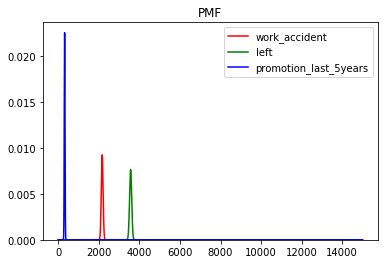

In [210]:
% matplotlib inline
plt.plot(b_pmf['work_accident'], 'r', label='work_accident')
plt.plot(b_pmf['left'], 'g', label='left')
plt.plot(b_pmf['promotion_last_5years'], 'b', label='promotion_last_5years')
plt.ylim(ymin=0)
plt.legend()
plt.title('PMF')

In [204]:
b_cdf = {}

for x in p.to_dict():
    y = []
    myBinom = binom(n=N, p=p[x])

    for k in range(N):
        y.append(myBinom.cdf(k))
    b_cdf[x] = y

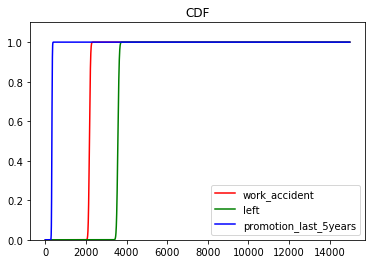

In [207]:
plt.plot(b_cdf['work_accident'], 'r', label='work_accident')
plt.plot(b_cdf['left'], 'g', label='left')
plt.plot(b_cdf['promotion_last_5years'], 'b', label='promotion_last_5years')
plt.ylim(ymax=1.1, ymin=0)
plt.legend()
plt.title('CDF')

### The Normal Distribution
The Normal distribution (or sometimes called the Bell Curve or Guassian) is by far the most prevalent and useful distribution in any field that utilizes statistical techniques.  In fact, it can be shown that the means of random variables sampled from **any** distribution eventually form a normal given a sufficiently large sample size.

A normal distribution is characterized by the PDF given by
$$p(x|\mu,\sigma) = \frac{1}{\sqrt{(2\pi\sigma^2)}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

where $\mu$ is the mean and $\sigma^2$ is the variance, thus the distribution is characterized by mean and variance alone.  In this exercise, you'll examine variables in the HR dataset and construct normals approximating them.

Using the HR data, answer the following

1. Which variables may be approximately normal?
1. For the variables in part 1, plot histograms.
1. Compute the mean and variance for each of the variables used in parts 1 and 2.
1. Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part 1.  Are they well approximated by normals?

### The Poisson Distribution
The Poisson distribution is very versatile but is typically used to model counts, such as, the amount of clicks per advertisement and arriving flights per unit time.  It has a PDF given by
$$ P(X = x, \lambda) = \frac{\lambda^x e^{-\lambda}}{x!} $$
where the mean and variance are both equal to $\lambda$

Using the HR data, answer the following.

1. What variables would be good candidates for modeling with a Poisson distribution?
1. For each variable in part 1, divide each by salary and fit a Poisson distribution to each.
1. Compute the probability of obtaining at least the mean of all salary levels in each category by using the Poisson distributions you constructed in part 2.  Comment on your results.

### The Central Limit Theorem
The Central Limit Theorem is perhaps one of the most remarkable results in statistics and mathematics in general.  In short, it says that the distribution of means of independent random variables, sampled from **any** distribution, tends to approach a normal distribution as the sample size increases.

An example of this would be taking a pair of dice, rolling them, and recording the mean of each result.  The Central Limit Theorem states, that after enough rolls, the distribution of the means will be approximately normal.  Stated formally, the result is
    $$ \bar{X_n} \approx N(\mu, \sigma^2/n) = \frac{\bar{X_n} - \mu}{\sigma \sqrt{n}}$$
In this exercise, you'll conduct simulation experiments to explore this idea.

Using the HR data, answer the following.
1. Choose two variables which may be good candidates to test this theorem.
1. Using the variables chosen in part 1, randomly select a set of `n = 10` samples and take the mean.  Repeat this 1000 times for each variable.
1. Plot a histogram for each variable used in part 2.  Comment on your results.
1. Repeat parts 2-3 for `n = 100`, `n = 500`, and `n = 1000`.  Comment on your results.
1. Overlay a normal curve on your `n = 1000` plots, using the mean and variance computed from the data.  Comment on your results.

## Hypothesis Testing
Hypothesis testing is essentially using the data to answer questions of interest.  For example, does a new medication provide any benefit over placebo?  Or is a subset of the population disproportionately more susceptible to a particular disease?  Or is the difference between two companies profits' significant or due to chance alone?

Before doing some hypothesis testing on the HR data, recall that hypothesis typically come in pairs of the form $H_0$, called the null hypothesis, versus $H_a$, called the alternative hypothesis.  The null hypothesis represents the "default" assumption -- that a medication has no effect for example, while the alternative hypothesis represents what we are looking to discover, in the medication case, whether it provides a significant benefit.  Another common case is testing the difference between two means.  Here, the null hypothesis is that there is no difference between two population means, whereas the alternative hypothesis is that there is a difference.  Stated more precisely
$$H_0: \mu_1 - \mu_2 = 0$$
$$H_a: \mu_1 - \mu_2 \ne 0$$

Hypotheses are usually tested by constructing a confidence interval around the test statistic and selecting a "cut-off" significance level denoted $\alpha$.  A typical $\alpha$ significance is 0.05.  If a test produces a P-value of $\alpha$ or below, then the null hypothesis can be rejected, strengthening the case of the alternative hypothesis.  It is very important to remember that hypothesis testing can only tell you if your hypothesis is statistically significant -- this does **not** mean that your result may be scientifically significant which requires much more evidence.

In this exercise, you'll explore the HR data more and test some hypotheses.

Using the HR data, answer the following.

1. Compute a confidence interval for satisfaction levels, at the 95% level, of employees who left the company and those who didn't.  Do this using both a t distribution and a normal.  Comment on your results.
1. Use a t-test to test the hypothesis that employees who left the company, had lower satisfaction levels than those who did not.  If significant, are the means different?  Comment on your results.  (Hint: Do the two populations have equal variance?)
1. Fit a normal curve to each group in part 2 and put them on the same plot next to each other.  Comment on your results.
1. Test the hypothesis that the satisfaction level between each salary group, denoted by k, differs signicantly from the mean.  Namely
    - $H_0: \mu - \mu_k = 0$
    - $H_a: \mu - \mu_k \ne 0$
1. How would you interpret your results in part 5?
1. Generate plots for part 5 as you did in part 3.  What conclusions can you draw from the plot?
1. Repeat parts 4-6 on a hypothesis of your choosing.
1. Recall that Power is the probability of failing to reject the null hypothesis when it is false (thus more power is good).  Compute the power for the hypothesis that the satisfaction level of high paid employees is different than that of medium paid employees using a t distribution.

## Bootstrapping
Bootstrapping is an immensely useful technique in practice.  Very often you may find yourself in a situation where you want to compute a statistic, but lack sufficient data to do so.  Bootstrapping works as a remedy to this problem.

Recall that the bootstrapping algorithm breaks down as follows:
1. Sample n observations with replacement from the observed data resulting in one simulated complete data set. 
1. Take the statistic of the simulated data set
1. Repeat these two steps B times, resulting in B simulated statistics
1. These statistics are approximately drawn from the sampling distribution of the statistic of n observations

In this exercise, you will implement this algorithm on the HR data.

Write a function that can perform boostrapping for the median of a set of n samples in the HR data set.  Test this function on the `satisfaction_level` with `n = 100` and `b = 100` and compare your results to the true median.  Also compute the standard deviation of the bootstrapped median.